### Task-2 : Stock Market Prediction

### Collecting and unzipping data

In [1]:
import zipfile
data=zipfile.ZipFile('stock_market.zip')
data.extractall()
data.close()

### Importing dependencies

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import plot_model

### Visualising Stock Market Data

In [9]:
df=pd.read_csv('/content/microsoft_stocks.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


### Checking for Null Values

In [10]:
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1925, 6)
Null Value Present:  False


### Plotting the True Adjusted Close Value

<Axes: xlabel='Date'>

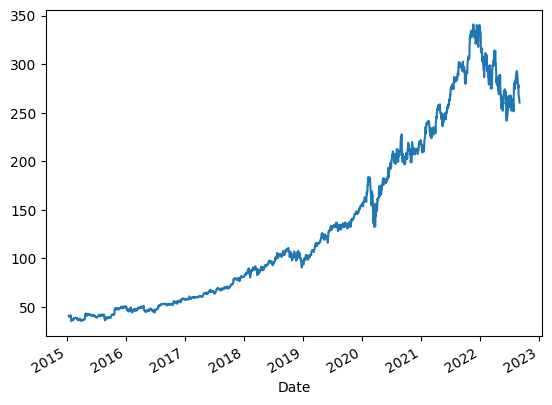

In [11]:
df['Adj Close'].plot()

### Setting the Target Variable and Selecting the Features

In [12]:
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

### Scaling the data

In [13]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2015-01-12,0.023268,0.022011,0.021952,0.100324
2015-01-13,0.021789,0.023209,0.020960,0.172161
2015-01-14,0.018470,0.017803,0.019505,0.137840
2015-01-15,0.019324,0.018257,0.018811,0.156581
2015-01-16,0.016334,0.017933,0.018018,0.174787


### Creating a Training Set and a Test Set for Stock Market Prediction

In [14]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

### Data Processing For LSTM

In [15]:
x =np.array(X_train)
y =np.array(X_test)
X_train = x.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = y.reshape(X_test.shape[0], 1, X_test.shape[1])

### Building the LSTM Model for Stock Market Prediction

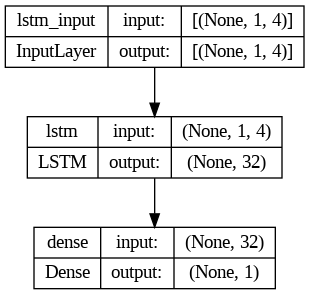

In [16]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

### Training the Stock Market Prediction Model

In [17]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 20006.4141
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 18678.2070
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 16664.0098
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 14068.5547
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 11231.4238
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 8492.5078
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 6105.1216
Epoch 8/100
219/219 [==============================] - 0s 2ms/step - loss: 4208.6909
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 2832.2778
Epoch 10/100
219/219 [==============================] - 0s 2ms/step - loss: 1917.7426
Epoch 11/100
219/219 [==============================] - 0s 2ms/step - loss: 1355.9629
Epoch 12/100
219/219 [==============================] - 0s

### Comparing Predicted vs True Adjusted Close Value – LSTM

6/6 [==============================] - 0s 3ms/step


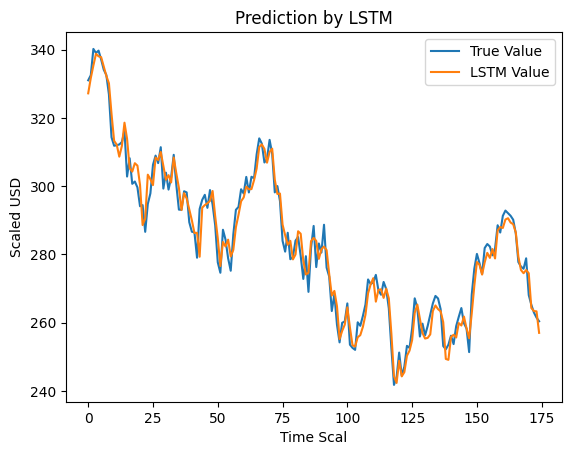

In [18]:
y_pred= lstm.predict(X_test)
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scal')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()